# Importación de módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creación del dataframe

In [2]:
# Lectura de datos históricos
df = pd.read_excel('./datasets/Heart_diagnosis.xlsx', sheet_name='heart')

**INFORMACIÓN DEL DATASET**

https://www.kaggle.com/ronitf/heart-disease-uci
1. age
2. sex (0=female, 1=male)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Variable salida: "target" => "0"="No hay problema de corazón" / "1" = "Sí hay problema de corazón"

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Verificamos si el dataframe contiene valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Vemos los datos estadísticos del dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Visualización

<AxesSubplot: xlabel='target', ylabel='count'>

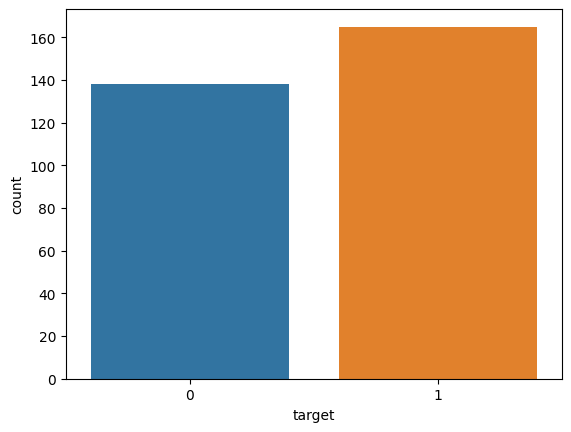

In [7]:
# Verificamos que haya una proporción equilibrada entre 0 y 1 en la variable objetivo para obtener un buen modelado posterior
sns.countplot(x='target', data=df)

In [8]:
# Visualizamos la correlación entre las variables de entrada y la variable objetivo
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

<AxesSubplot: >

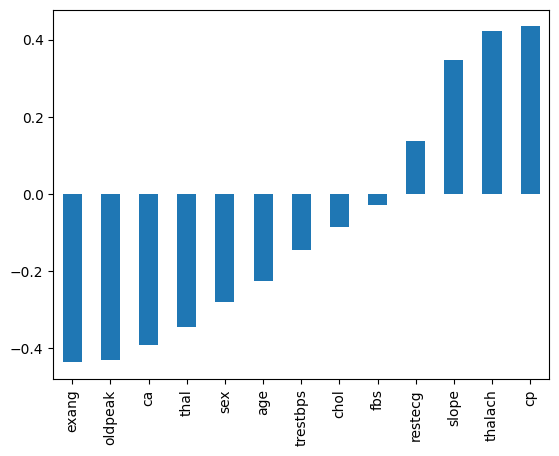

In [9]:
# Podemos generar un plot de barras con la correlación entre las variables de entrada y la variable objetivo
df.corr()['target'][:-1].sort_values().plot(kind='bar')

<AxesSubplot: >

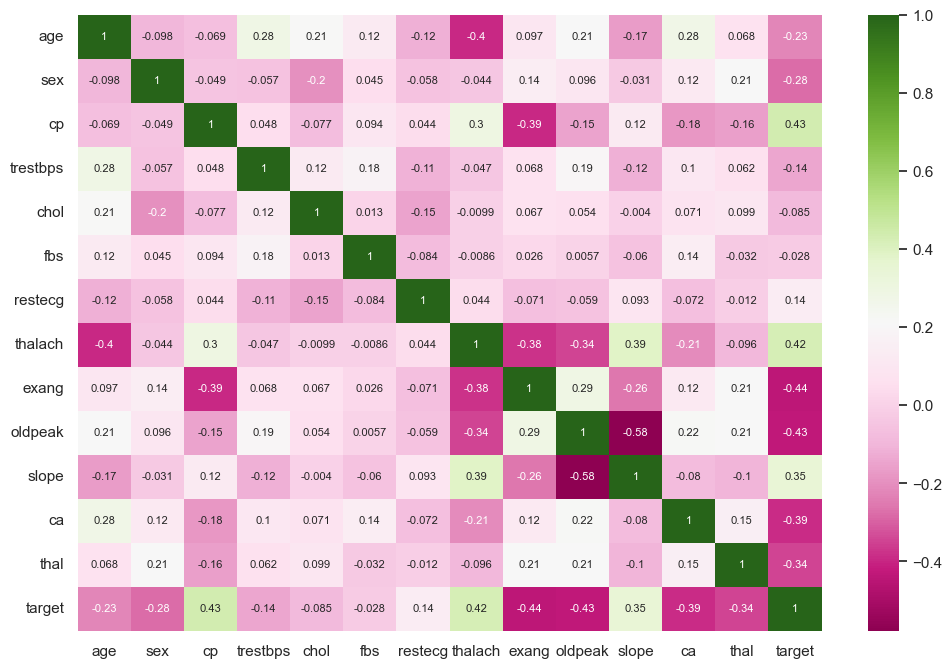

In [10]:
# Podemos generar un mapa de calor con la correlación entre las variables
plt.figure(figsize=(12,8))
sns.set()
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 8}, cmap='PiYG')

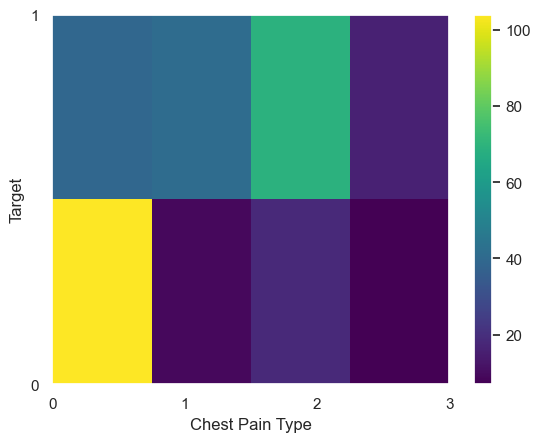

In [11]:
# Visualizamos las variables altamente correlacionadas con la variable objetivo

# Chest Pain (Si los valores están normalizados, lo mejor es utilizar un histograma 2D)
plt.hist2d(df['cp'], df['target'], bins=(4, 2), cmap=plt.cm.viridis)
plt.xlabel('Chest Pain Type')
plt.xticks(range(0, 4, 1))
plt.ylabel('Target')
plt.yticks(range(0, 2, 1))
plt.colorbar()

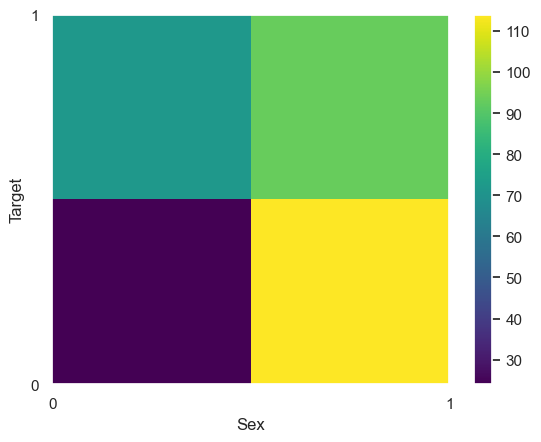

In [12]:
# Sex
plt.hist2d(df['sex'], df['target'], bins=(2, 2), cmap=plt.cm.viridis)
plt.xlabel('Sex')
plt.xticks(range(0, 2, 1))
plt.ylabel('Target')
plt.yticks(range(0, 2, 1))
plt.colorbar()

# Limpieza Final

In [13]:
# Eliminamos las variables poco correlacionadas con la variable objetivo
df = df.drop(['chol', 'fbs'], axis=1)
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


# Train/Test split

In [14]:
# Dividimos los conjuntos X e Y
X = df.drop('target', axis=1)
y = df['target'].values

In [15]:
# Importamos train_test_split
from sklearn.model_selection import train_test_split

In [16]:
# Realizamos el split en 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)

# Escalado

In [17]:
# Impotamos MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creamos una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Adaptamos scaler a nuestro conjunto de entrenamiento
scaler.fit(X_train)

# Escalamos los conjuntos de prueba y entrenamiento
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creación del modelo

Para un problema de clasificación binario utilizamos como optimizador 'rmsprop' o 'adam', en el argumento loss indicamos 'binary_crossentropy', y 
como métrica utilizamos 'accuracy'

In [18]:
# Realizamos las importaciones necesarias
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Creamos un modelo secuencial
model = Sequential()

# Iteramos una variable con un número de neuronas igual a la cantidad de variables de entrada
num_neuronas = X_train.shape[1]

# Elegimos un número de capas (https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)
# Creamos una capa oculta con una neurona por cada variable de entrada con función de activación ReLu
model.add(Dense(units=num_neuronas, activation='relu'))

# Creamos otra capa oculta con la mitad de neuronas (suele hacerse para acelerar el entrenamiento) con función de activación ReLu
model.add(Dense(units=np.round(num_neuronas/2), activation='relu'))

# Creamos una capa de salida con una neurona por cada variable de salida con función de activación Sigmoid (recomendada para clasificación binaria)
model.add(Dense(units=1, activation='sigmoid'))

# Compilamos el modelo con optimizador adam y binary_crossentropy en las pérdidas
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

# Entrenamiento del modelo

**Información para poder elegir el número de iteraciones**

https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network

https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

In [19]:
# Entrenamos el modelo utilizando 600 iteraciones
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=600,
    verbose=1
)

Epoch 1/600
8/8 [==============================] - 1s 45ms/step - loss: 0.6940 - val_loss: 0.6824
Epoch 2/600
8/8 [==============================] - 0s 10ms/step - loss: 0.6910 - val_loss: 0.6802
Epoch 3/600
8/8 [==============================] - 0s 11ms/step - loss: 0.6882 - val_loss: 0.6773
Epoch 4/600
8/8 [==============================] - 0s 14ms/step - loss: 0.6847 - val_loss: 0.6727
Epoch 5/600
8/8 [==============================] - 0s 9ms/step - loss: 0.6808 - val_loss: 0.6673
Epoch 6/600
8/8 [==============================] - 0s 10ms/step - loss: 0.6763 - val_loss: 0.6600
Epoch 7/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6708 - val_loss: 0.6525
Epoch 8/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6641 - val_loss: 0.6438
Epoch 9/600
8/8 [==============================] - 0s 9ms/step - loss: 0.6565 - val_loss: 0.6317
Epoch 10/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6469 - val_loss: 0.6192
Epoch 11/600
8/8 [======

<AxesSubplot: >

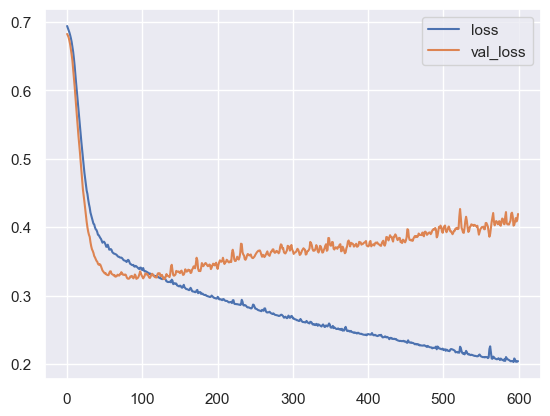

In [20]:
# Visualizamos las pérdidas
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Al realizar 600 iteraciones se generó un Overfitting. Para evitarlo, aplicamos un Early Stopping para seguir a 'val_loss' y parar en base a la condición indicada



    EarlyStopping() arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [21]:
# Creamos el modelo nuevamente
model = Sequential()
num_neuronas = X_train.shape[1]
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(units=np.round(num_neuronas/2), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
# Importamos la clase EarlyStopping desde keras.callbacks
from keras.callbacks import EarlyStopping

# Definimos un objeto de EarlyStopping con monitorización en 'val_loss', modo 'min' y patience de 25.
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=25,
    verbose=1
)

model.fit(
    x=X_train,
    y=y_train, 
    validation_data=(X_test, y_test),
    epochs=600,
    callbacks=[early_stop]
)

Epoch 1/600
8/8 [==============================] - 1s 33ms/step - loss: 0.6926 - val_loss: 0.6981
Epoch 2/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6911 - val_loss: 0.6972
Epoch 3/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6895 - val_loss: 0.6956
Epoch 4/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6882 - val_loss: 0.6940
Epoch 5/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6869 - val_loss: 0.6927
Epoch 6/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6856 - val_loss: 0.6913
Epoch 7/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6838 - val_loss: 0.6900
Epoch 8/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6819 - val_loss: 0.6886
Epoch 9/600
8/8 [==============================] - 0s 8ms/step - loss: 0.6799 - val_loss: 0.6869
Epoch 10/600
8/8 [==============================] - 0s 9ms/step - loss: 0.6779 - val_loss: 0.6850
Epoch 11/600
8/8 [==========

<AxesSubplot: >

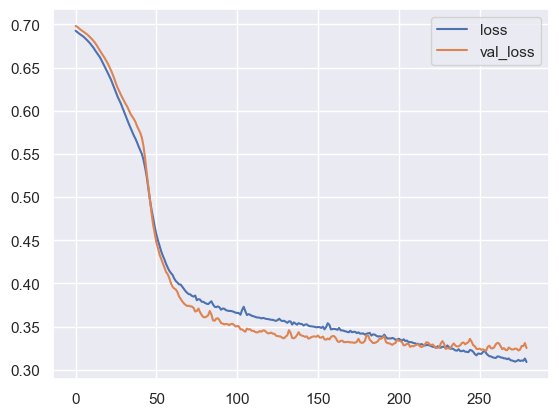

In [23]:
# Visualizamos las pérdidas
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Otro forma de evitar el Overfiting es añadiendo DropOut Layers, lo que consiste en desactivar capas en cada epoch, a las cuales no se le ajustaran los pesos y bias

In [24]:
# Importamos la clase Dropout desde keras.layers
from keras.layers import Dropout

# Creamos el modelo añadiendo los DropOuts
model = Sequential()
num_neuronas = X_train.shape[1]

# Creamos la primer capa oculta
model.add(Dense(units=num_neuronas, activation='relu'))

# Desactivamos la mitad de las neuronas en cada epoch para esta capa
model.add(Dropout(.5))

# Creamos la segunda capa oculta
model.add(Dense(units=np.round(num_neuronas/2), activation='relu'))

# Desactivamos la mitad de las neuronas en cada epoch para esta capa
model.add(Dropout(.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
# Entrenamos el modelo utilizando Early Stopping
model.fit(
    x=X_train,
    y=y_train, 
    validation_data=(X_test, y_test),
    epochs=600,
    callbacks=[early_stop]
)

Epoch 1/600
8/8 [==============================] - 1s 34ms/step - loss: 0.7223 - val_loss: 0.7065
Epoch 2/600
8/8 [==============================] - 0s 8ms/step - loss: 0.7670 - val_loss: 0.6986
Epoch 3/600
8/8 [==============================] - 0s 9ms/step - loss: 0.7203 - val_loss: 0.6934
Epoch 4/600
8/8 [==============================] - 0s 11ms/step - loss: 0.7472 - val_loss: 0.6887
Epoch 5/600
8/8 [==============================] - 0s 10ms/step - loss: 0.6885 - val_loss: 0.6839
Epoch 6/600
8/8 [==============================] - 0s 10ms/step - loss: 0.7222 - val_loss: 0.6817
Epoch 7/600
8/8 [==============================] - 0s 8ms/step - loss: 0.7305 - val_loss: 0.6807
Epoch 8/600
8/8 [==============================] - 0s 9ms/step - loss: 0.6963 - val_loss: 0.6786
Epoch 9/600
8/8 [==============================] - 0s 11ms/step - loss: 0.6836 - val_loss: 0.6771
Epoch 10/600
8/8 [==============================] - 0s 10ms/step - loss: 0.6714 - val_loss: 0.6747
Epoch 11/600
8/8 [=====

<AxesSubplot: >

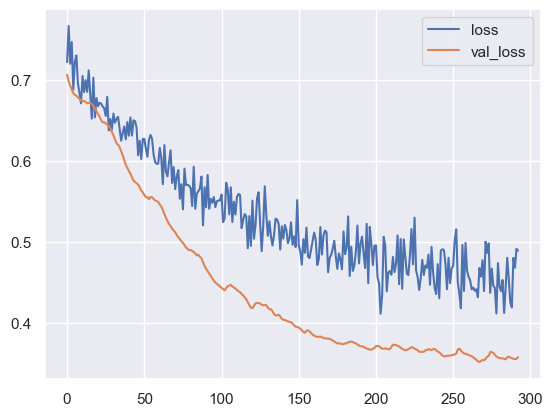

In [26]:
# Visualizamos las pérdidas
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Evaluación del modelo

In [27]:
# Importamos los métodos necesarios
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Realizamos una predicción sobre el conjunto de test
predictions = np.round(model.predict(X_test))

# Generamos un reporte de clasificación comparando los valores reales con las predicciones
print(classification_report(y_test, predictions))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.81      0.90      0.85        39

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [32]:
# Generamos una matriz de confusión para analizar los errores. Retorna una matriz donde se muestra:
#  ---------------------
# |   | acierto | error |   osea:
# |---+---------+-------|        [
# | 1 |    n    |   n   |          [0 en ambos, 0 real y predicción 1],
# |---+---------+-------|          [1 real y predicción 0, 1 en ambos]
# | 0 |    n    |   n   |        ]
#  ---------------------

print(confusion_matrix(y_test, predictions))


[[29  8]
 [ 4 35]]


# Predicción de nuevos datos

In [34]:
df_pred = pd.read_excel('./datasets/Heart_diagnosis.xlsx', sheet_name='Datos_Predecir')
df_pred = df_pred[df.columns]
X_pred = df_pred.drop('target', axis=1)
X_pred = scaler.transform(X_pred)
resultado = np.round(model.predict(X_pred))
df_pred['PREDICCIÓN'] = pd.DataFrame(resultado)
df_pred

1/1 [==============================] - 0s 53ms/step


,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target,PREDICCIÓN
0,60,1,3,145,0,150,0,2.3,0,0,1,NaN,1.0
1,42,1,2,130,1,187,0,3.5,0,0,2,NaN,1.0
2,40,0,1,130,0,172,0,1.4,2,0,2,NaN,1.0
3,55,1,1,120,1,178,0,0.8,2,0,2,NaN,1.0
4,62,0,0,120,1,163,1,0.6,2,0,2,NaN,1.0
5,58,1,0,140,1,148,0,0.4,1,0,1,NaN,1.0
6,55,0,1,140,0,153,0,1.3,1,0,2,NaN,1.0
7,34,1,1,120,1,173,0,0.0,2,0,3,NaN,1.0
8,50,1,2,172,1,162,0,0.5,2,0,3,NaN,1.0
9,59,1,2,150,1,174,0,1.6,2,0,2,NaN,1.0


# Guardar modelo

In [35]:
model.save('modelo_pred_heart.h5')